# Assignment 1
Submitted by :

## Titanic
- For this problem, use only 1 target output variable (Survived)
- Prepare the data and perform necessary feature engineering
- Create **_at least two models_** 
- Evaluate the models and pick the best candidate
- Form some conclusions

In [1]:
# shift-tab to show docstring: highlight and shift-tab: format
#?zip()
#%lsmagic
# Suppress Future Warnings
import warnings
#warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.filterwarnings('ignore')

# Data Importing¶

In [2]:
import sklearn
import numpy as np
import pandas as pd
import matplotlib
import platform

message="        Versions        "
print("*"*len(message))
print(message)
print("*"*len(message))
print("Scikit-learn version={}".format(sklearn.__version__))
print("Numpy version={}".format(np.__version__))
print("Pandas version={}".format(pd.__version__))
print("Matplotlib version={}".format(matplotlib.__version__))
print("Python version={}".format(platform.python_version()))

************************
        Versions        
************************
Scikit-learn version=0.24.1
Numpy version=1.20.1
Pandas version=1.2.4
Matplotlib version=3.3.4
Python version=3.8.8


In [3]:
import numpy as np
import pandas as pd
from sklearn import datasets 
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline

In [4]:
titanic = pd.read_csv("train.csv")
titanic.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


In [5]:
titanictest = pd.read_csv("test.csv")
titanictest.head(5)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


# Exploratory Data Analysis

In [1]:
titanic.info()

NameError: name 'titanic' is not defined

In [7]:
# List out all variables with nulls/missing values
titanic.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [8]:
# Get list of numeric and nonnumeric variables
numvars = list(titanic.columns[titanic.dtypes != "object"])
nonnumvars = list(titanic.columns[titanic.dtypes == "object"])
print(numvars)
print(nonnumvars)

['PassengerId', 'Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare']
['Name', 'Sex', 'Ticket', 'Cabin', 'Embarked']


In [9]:
# Do some further exploration on list to get list of features used
numvars.remove('PassengerId')
numvars.remove('Survived')
numfeats = numvars
print(numfeats)

#nonnumvars.remove('Cabin')
nonnumvars.remove('Name')
nonnumvars.remove('Ticket')
nonnumfeats = nonnumvars
print(nonnumfeats)

['Pclass', 'Age', 'SibSp', 'Parch', 'Fare']
['Sex', 'Cabin', 'Embarked']


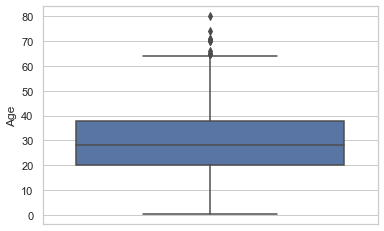

In [10]:
%matplotlib inline

import seaborn as sns
sns.set(style="whitegrid")
ax = sns.boxplot(y=titanic["Age"])

<AxesSubplot:>

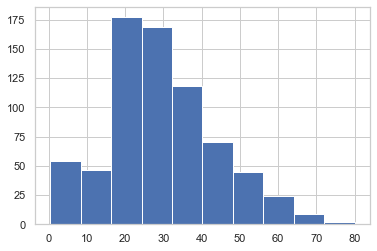

In [11]:
titanic['Age'].hist(bins=10)


# Data Preparation

## Handle missing values

In [12]:
# Age has some missing values which needs to be filled
titanic['Age'].fillna(titanic['Age'].mean(), inplace=True)
model_mean_age = titanic['Age'].mean()
titanic.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,13.002015,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,29.699118,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [13]:
# For the cabin parameter there are over 600 missing values
# We will replace the Cabin value with No if missing and Yes if there is a cabin number
titanic['Cabin'].fillna('No', inplace=True)
titanic['Cabin'].replace(regex=r'^((?!No).)*$',value='Yes',inplace=True)
titanic.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,No,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,Yes,C


In [14]:
# 2 missing values in the embarked
# use the mode to replace it
titanic['Embarked'].fillna(titanic['Embarked'].mode()[0], inplace=True)
model_embarked_mode = titanic['Embarked'].mode()[0]
titanic.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,No,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,Yes,C


In [15]:
# Drop the PassengerId and Name
titanic = titanic.drop(["PassengerId","Name","Ticket"],axis=1)
titanic.head(2)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0,3,male,22.0,1,0,7.2500,No,S
1,1,1,female,38.0,1,0,71.2833,Yes,C


In [16]:
# Encode all the categorical variables
titanicdf = pd.get_dummies(titanic,columns=nonnumfeats)
titanicdf.head(2)

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Cabin_No,Cabin_Yes,Embarked_C,Embarked_Q,Embarked_S
0,0,3,22.0,1,0,7.2500,0,1,1,0,0,0,1
1,1,1,38.0,1,0,71.2833,1,0,0,1,1,0,0


In [17]:
titanicdf.dtypes

Survived        int64
Pclass          int64
Age           float64
SibSp           int64
Parch           int64
Fare          float64
Sex_female      uint8
Sex_male        uint8
Cabin_No        uint8
Cabin_Yes       uint8
Embarked_C      uint8
Embarked_Q      uint8
Embarked_S      uint8
dtype: object

In [18]:
titanicdf.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Cabin_No,Cabin_Yes,Embarked_C,Embarked_Q,Embarked_S
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208,0.352413,0.647587,0.771044,0.228956,0.188552,0.086420,0.725028
std,0.486592,0.836071,13.002015,1.102743,0.806057,49.693429,0.477990,0.477990,0.420397,0.420397,0.391372,0.281141,0.446751
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,3.000000,29.699118,0.000000,0.000000,14.454200,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000
75%,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [19]:
# Since all values are numeric, do a correction and sort to determine
# the most important features relative to Survived
corr = titanicdf.corr()
corr.sort_values(["Survived"], ascending = False, inplace = True)
print(corr.Survived)

Survived      1.000000
Sex_female    0.543351
Cabin_Yes     0.316912
Fare          0.257307
Embarked_C    0.168240
Parch         0.081629
Embarked_Q    0.003650
SibSp        -0.035322
Age          -0.069809
Embarked_S   -0.149683
Cabin_No     -0.316912
Pclass       -0.338481
Sex_male     -0.543351
Name: Survived, dtype: float64


# Train Model

## Split Data into Train and Test Sets

In [20]:
from sklearn.model_selection import train_test_split
y = titanicdf["Survived"].values
X = titanicdf.drop(["Survived"],axis=1).values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)



## Train Model with Algorithm: Logistics Regression 

In [21]:
# Train Model with Logistics Regression
from sklearn.linear_model import LogisticRegression
clr = LogisticRegression()
clr.fit(X_train,y_train)
clr

LogisticRegression()

# Score and Evaluate Model¶

## Score Model and Evaluate Model with:  Logistics Regression

In [22]:
# score model for test set
y_hat= clr.predict(X_test)

<AxesSubplot:xlabel='Predicted', ylabel='Actual'>

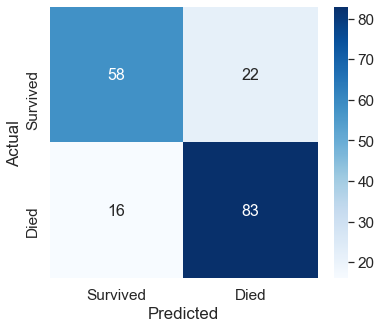

In [23]:
from sklearn.metrics import confusion_matrix
# evaluate model for test set
class_names=["Survived","Died"]
cm = confusion_matrix(y_test, y_hat, labels=[1,0])
df_cm = pd.DataFrame(cm, columns=class_names, index = class_names)
df_cm.index.name = 'Actual'
df_cm.columns.name = 'Predicted'
plt.figure(figsize = (6,5))
sns.set(font_scale=1.4)#for label size
sns.heatmap(df_cm, cmap="Blues", annot=True,annot_kws={"size": 16})# font size

In [24]:
# Accuracy score for test set
from sklearn.metrics import accuracy_score
score = accuracy_score(y_test, y_hat)
print("Accuracy score for the test set={:.2f}%".format(score*100))

Accuracy score for the test set=78.77%


# Submitting to Kaggle

## Stupid Baseline (Everyone Dies)

The stupid baseline is based on the majority of *Survived* status. In which case, we will have a rule which states that everybody died in the Titanic. 

In [25]:
dfout = pd.DataFrame() 
dfout[["PassengerId"]] = titanictest[["PassengerId"]]
dfout["Survived"] = 0
dfout[:5]


,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0


In [26]:
dfout.to_csv("stupidbaseline.csv",index=False)

## Data Preparation for the test.csv

In [27]:
titanictest.dtypes

PassengerId      int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [28]:
titanictestdf = titanictest.drop(["PassengerId","Name","Ticket"],axis=1)
titanictestdf.head(2)

,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,3,male,34.5,0,0,7.8292,NaN,Q
1,3,female,47.0,1,0,7.0000,NaN,S


In [29]:
# List out all variables with nulls/missing values
titanictestdf.isnull().sum()

Pclass        0
Sex           0
Age          86
SibSp         0
Parch         0
Fare          1
Cabin       327
Embarked      0
dtype: int64

In [30]:
# fill in the missing age
titanictestdf['Age'].fillna(titanic['Age'].mean(), inplace=True)

In [31]:
# fill in the missing cabins
# We will replace the Cabin value with No if missing and Yes if there is a cabin number
titanictestdf['Cabin'].fillna('No', inplace=True)
titanictestdf['Cabin'].replace(regex=r'^((?!No).)*$',value='Yes',inplace=True)
titanictestdf.head(2)

,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,3,male,34.5,0,0,7.8292,No,Q
1,3,female,47.0,1,0,7.0000,No,S


In [32]:
# fill in the missing fare with the mean fare
titanictestdf['Fare'].fillna(titanic['Fare'].mean(), inplace=True)

In [33]:
# List out all variables with nulls/missing values
titanictestdf.isnull().sum()

Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Cabin       0
Embarked    0
dtype: int64

In [34]:
# Encode all the categorical variables
predictdf = pd.get_dummies(titanictestdf,columns=nonnumfeats)
predictdf.head(2)

,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Cabin_No,Cabin_Yes,Embarked_C,Embarked_Q,Embarked_S
0,3,34.5,0,0,7.8292,0,1,1,0,0,1,0
1,3,47.0,1,0,7.0000,1,0,1,0,0,0,1


In [35]:
Xp = predictdf.values
Xp[:2]

array([[ 3.    , 34.5   ,  0.    ,  0.    ,  7.8292,  0.    ,  1.    ,
         1.    ,  0.    ,  0.    ,  1.    ,  0.    ],
       [ 3.    , 47.    ,  1.    ,  0.    ,  7.    ,  1.    ,  0.    ,
         1.    ,  0.    ,  0.    ,  0.    ,  1.    ]])

## Prediction with Logistics Regression Trained Model

In [36]:
yp_hat = clr.predict(Xp)

In [37]:
dfout = pd.DataFrame() 
dfout[["PassengerId"]] = titanictest[["PassengerId"]]
dfout["Survived"] = yp_hat
dfout[:5]

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1


In [38]:
dfout.to_csv("lrpredict.csv",index=False)

# Conclusions

# References

## Tutorials
- [Titanic Data Science Solutions Python Notebook](https://www.kaggle.com/startupsci/titanic-data-science-solutions)
- [An Interactive Data Science Tutorial](https://www.kaggle.com/helgejo/an-interactive-data-science-tutorial)